<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Programming-Assignment:" data-toc-modified-id="Programming-Assignment:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Programming Assignment:</a></span><ul class="toc-item"><li><span><a href="#Готовим-LDA-по-рецептам" data-toc-modified-id="Готовим-LDA-по-рецептам-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Готовим LDA по рецептам</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Составление-корпуса" data-toc-modified-id="Составление-корпуса-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Составление корпуса</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Фильтрация-словаря" data-toc-modified-id="Фильтрация-словаря-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Фильтрация словаря</a></span></li><li><span><a href="#Сравнение-когерентностей" data-toc-modified-id="Сравнение-когерентностей-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Сравнение когерентностей</a></span></li><li><span><a href="#Изучение-влияния-гиперпараметра-alpha" data-toc-modified-id="Изучение-влияния-гиперпараметра-alpha-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Изучение влияния гиперпараметра alpha</a></span></li><li><span><a href="#LDA-как-способ-понижения-размерности" data-toc-modified-id="LDA-как-способ-понижения-размерности-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>LDA как способ понижения размерности</a></span></li><li><span><a href="#LDA-—-вероятностная-модель" data-toc-modified-id="LDA-—-вероятностная-модель-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>LDA — вероятностная модель</a></span></li><li><span><a href="#Интерпретация-построенной-модели" data-toc-modified-id="Интерпретация-построенной-модели-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Интерпретация построенной модели</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Заключение</a></span></li></ul></li></ul></li></ul></div>

# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


### Составление корпуса

In [6]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [46]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2token(text) for text in texts]  # составляем корпус документов

AttributeError: 'Dictionary' object has no attribute 'doc2token'

In [8]:
print(texts[0])
print(corpus[0])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [60]:
np.random.seed(76543)
# здесь код для построения модели:
lda_model = models.LdaModel(corpus=corpus, num_topics=40, iterations=5, id2word=dictionary)
top_words = lda_model.show_topics(num_topics=40, num_words=10, formatted=False)
lda_model.show_topics(num_topics=40, num_words=10, formatted=True)

[(0,
  '0.062*"peeled fresh ginger" + 0.053*"curry powder" + 0.053*"garlic cloves" + 0.051*"salt" + 0.042*"green beans" + 0.032*"vegetable oil" + 0.029*"water" + 0.028*"roasted red peppers" + 0.027*"vegetable stock" + 0.027*"baking potatoes"'),
 (1,
  '0.087*"low sodium chicken broth" + 0.077*"russet potatoes" + 0.064*"chopped fresh chives" + 0.050*"sausages" + 0.044*"1% low-fat milk" + 0.044*"cream cheese, soften" + 0.041*"celery ribs" + 0.034*"chile powder" + 0.028*"kosher salt" + 0.023*"carrots"'),
 (2,
  '0.096*"fresh parsley" + 0.061*"olive oil" + 0.038*"salt" + 0.037*"chopped onion" + 0.032*"garlic cloves" + 0.031*"butter" + 0.031*"fresh rosemary" + 0.025*"chopped celery" + 0.022*"onions" + 0.021*"low salt chicken broth"'),
 (3,
  '0.063*"onions" + 0.057*"celery" + 0.057*"bay leaf" + 0.055*"salt" + 0.053*"bacon" + 0.043*"garlic" + 0.043*"ground black pepper" + 0.040*"fresh basil leaves" + 0.031*"carrots" + 0.031*"chicken stock"'),
 (4,
  '0.149*"all-purpose flour" + 0.099*"salt" 

In [73]:
for word in ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]:
    count = 0
    for i in top_words:
        for j in i[1]:
            if word == j[0]:
                count += 1
    
    print(word, "-", count)

salt - 27
sugar - 10
water - 8
mushrooms - 0
chicken - 0
eggs - 3


In [75]:
save_answers1(27, 10, 8, 0, 0, 3)

In [74]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [127]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [128]:
print("The lendth of the dictionary2 before:", len(dictionary2))
most_frequency_words = [i for (i, value) in dictionary2.dfs.items() if value>4000]
dictionary2.filter_tokens(most_frequency_words) # this function works inplace
print("The lendth of the dictionary2 after:", len(dictionary2))
print("The lendth of the most_frequency_words:", len(most_frequency_words))

The lendth of the dictionary 2 before: 6714
The lendth of the dictionary 2 after: 6702
The lendth of the most_frequency_words: 12


In [137]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # составляем новый корпус документов

print("The lendth of the corpus before:", sum([len(i) for i in corpus]))
print("The lendth of the corpus after:", sum([len(i) for i in corpus2]))

The lendth of the corpus before: 428249
The lendth of the corpus after: 343665


In [139]:
save_answers2(6714, 6702, 428249, 343665)

In [138]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [140]:
np.random.seed(76543)
# здесь код для построения модели:
lda_model2 = models.LdaModel(corpus=corpus2, num_topics=40, iterations=5, id2word=dictionary2)
top_words2 = lda_model.show_topics(num_topics=40, num_words=10, formatted=False)
lda_model2.show_topics(num_topics=40, num_words=10, formatted=True)

[(0,
  '0.082*"pork" + 0.070*"baking potatoes" + 0.053*"dried parsley" + 0.035*"jack cheese" + 0.033*"tomato juice" + 0.033*"egg noodles" + 0.032*"cottage cheese" + 0.032*"crushed garlic" + 0.031*"leaves" + 0.028*"fat free milk"'),
 (1,
  '0.137*"ground beef" + 0.068*"cheese" + 0.058*"green pepper" + 0.054*"tortilla chips" + 0.046*"diced onions" + 0.034*"red pepper" + 0.032*"rice" + 0.031*"sweet onion" + 0.030*"lettuce" + 0.029*"slivered almonds"'),
 (2,
  '0.109*"crushed red pepper flakes" + 0.078*"chile pepper" + 0.050*"fresh ginger root" + 0.048*"fresh spinach" + 0.045*"salt and ground black pepper" + 0.029*"beef stock" + 0.027*"white sugar" + 0.027*"dried shiitake mushrooms" + 0.025*"chicken wings" + 0.025*"chili pepper"'),
 (3,
  '0.125*"dried thyme" + 0.080*"ground nutmeg" + 0.073*"ground cinnamon" + 0.058*"ground cloves" + 0.052*"ground pepper" + 0.045*"ground allspice" + 0.042*"half & half" + 0.029*"brandy" + 0.025*"white rice" + 0.023*"pure vanilla extract"'),
 (4,
  '0.099*"c

In [156]:
print("Когерентность модели №1,", np.mean([i[1] for i in lda_model.top_topics(corpus=corpus)]))
print("Когерентность модели №2,", np.mean([i[1] for i in lda_model2.top_topics(corpus=corpus2)]))

Когерентность модели №1, -5.316018721763305
Когерентность модели №2, -8.978687777035283


In [158]:
save_answers3(-5.316018721763305, -8.978687777035283)

In [157]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [168]:
lda_model2.get_document_topics(bow=corpus2)[0]

[(13, 0.1296169), (15, 0.12942241), (31, 0.62533325)]

Также выведите содержимое переменной *.alpha* второй модели:

In [167]:
lda_model2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [169]:
np.random.seed(76543)
# здесь код для построения модели:
lda_model3 = models.LdaModel(corpus=corpus2, num_topics=40, iterations=5, id2word=dictionary2, alpha=1, passes=5)
top_words3 = lda_model.show_topics(num_topics=40, num_words=10, formatted=False)
lda_model3.show_topics(num_topics=40, num_words=10, formatted=True)

[(0,
  '0.089*"canola oil" + 0.072*"kosher salt" + 0.060*"chile pepper" + 0.057*"boneless chicken skinless thigh" + 0.049*"bread crumbs" + 0.038*"flank steak" + 0.035*"chiles" + 0.022*"mussels" + 0.022*"red pepper flakes" + 0.021*"boneless skinless chicken breast halves"'),
 (1,
  '0.168*"ground cinnamon" + 0.085*"ground nutmeg" + 0.060*"raisins" + 0.058*"ground cloves" + 0.041*"dark brown sugar" + 0.038*"eggs" + 0.036*"garlic salt" + 0.031*"shortening" + 0.028*"anchovy fillets" + 0.028*"boiling water"'),
 (2,
  '0.064*"ground turmeric" + 0.062*"cumin seed" + 0.060*"garam masala" + 0.049*"tumeric" + 0.048*"green chilies" + 0.043*"cinnamon sticks" + 0.040*"clove" + 0.038*"oil" + 0.030*"coriander" + 0.029*"ginger"'),
 (3,
  '0.114*"white onion" + 0.077*"coarse salt" + 0.049*"large garlic cloves" + 0.035*"bananas" + 0.034*"kosher salt" + 0.032*"fresh orange juice" + 0.026*"poblano chiles" + 0.025*"ground pepper" + 0.024*"ancho chile pepper" + 0.024*"beef stock"'),
 (4,
  '0.175*"garlic po

In [175]:
count_without_alpha = sum([len(x) for x in lda_model2.get_document_topics(bow=corpus2, minimum_probability=0.01)])
count_with_alpha = sum([len(x) for x in lda_model3.get_document_topics(bow=corpus2, minimum_probability=0.01)])
count_without_alpha, count_with_alpha

(194090, 1590960)

In [177]:
save_answers4(count_without_alpha, count_with_alpha)

In [176]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [220]:
y = [recipe["cuisine"] for recipe in recipes]

theta = (lda_model2.get_document_topics(corpus2[0],minimum_probability = 0))
THETA = np.array(list(map(lambda x: x[1], theta)))
for i in range(1, len(corpus2)):
    THETA = np.vstack((THETA,np.array(list(map(lambda x: x[1], lda_model2.get_document_topics(corpus2[i], minimum_probability = 0))))))

In [221]:
clf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(clf,THETA,y, cv=3)
np.mean(scores)

0.5545327621176855

In [222]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [223]:
save_answers5(np.mean(scores))

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [273]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    items = []
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        if w not in items:
            items.append(w)
    
    return items

In [277]:
counter = 0
while True:
    try:
        items = generate_recipe(lda_model2, 10)
        print(items)
        print(len(items))
        break
    except: 
        counter += 1
        continue

print(counter)

['bacon slices', 'shredded cheddar cheese', 'fresh mozzarella', 'ham', 'carrots', 'boiling water', 'starch', 'fresh basil leaves', 'sausage links', 'shredded swiss cheese']
10
56


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [278]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [279]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [280]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

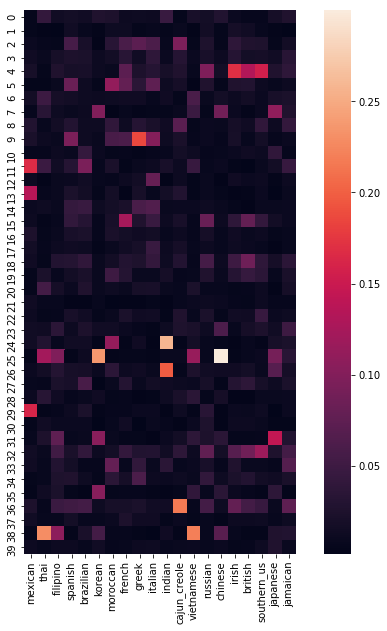

In [282]:
# Визуализируйте матрицу

asd = compute_topic_cuisine_matrix(lda_model, corpus, recipes)
plot_matrix(asd)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 